# Project: Decision Trees

## Part 1: Feature extraction

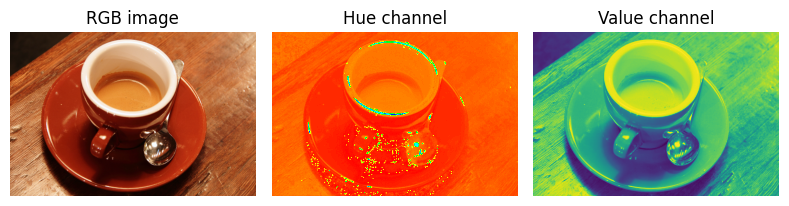

In [26]:
import numpy as np
import skimage.io as io
from skimage.color import rgb2hsv
from skimage import data
import matplotlib.pyplot as plt

# Load image and convert to HSV
rgb_img = io.imread('./train/acai/images.jpeg').astype(float)/255
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]

value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()


# # Extract Hue channel and make Numpy array for fast processing
# Hue = np.array(im.getchannel('H'))

# # Make mask of zeroes in which we will set greens to 1
# mask = np.zeros_like(Hue, dtype=np.uint8) 

# # # Set all green pixels to 1
# # mask[(Hue>80) & (Hue<90)] = 1 

# # # Now print percentage of green pixels
# # print((mask.mean()*100))
# Hue

In [24]:
hue_img

array([[0.06410256, 0.05555556, 0.04166667, ..., 0.08148148, 0.08052434,
        0.08333333],
       [0.07142857, 0.05555556, 0.08974359, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.03846154, 0.07575758, ..., 0.08333333, 0.08608059,
        0.08608059],
       ...,
       [0.06994048, 0.07301587, 0.07044674, ..., 0.06380208, 0.05694444,
        0.05555556],
       [0.07301587, 0.07026144, 0.07239057, ..., 0.05270655, 0.04824561,
        0.0497076 ],
       [0.07044674, 0.06597222, 0.07017544, ..., 0.04861111, 0.0497076 ,
        0.04532164]])

In [134]:
os.listdir('./train/acai')

['images (10).jpeg',
 'images (11).jpeg',
 'images (12).jpeg',
 'images (13).jpeg',
 'images (14).jpeg',
 'images (15).jpeg',
 'images (18).jpeg',
 'images (3).jpeg',
 'images (4).jpeg',
 'images (5).jpeg',
 'images (6).jpeg',
 'images (7).jpeg',
 'images (8).jpeg',
 'images (9).jpeg',
 'images.jpeg']

In [89]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import skimage.io as io
import os

In [123]:
def get_features(image):
    # TO DO
    return [image.shape[0], image.shape[1]]

In [125]:
X = []
y = []

for c in os.listdir('./train'):
    images = os.listdir('./train/' + c)
    for i in images:
        image = io.imread('./train/' + c + '/' + i).astype(float)/255
        # this should be a function 
        features = get_features(image)
        X.append(features)
        y.append(c)

X = np.array(X)
y = np.array(y)

(183, 275, 3)
(168, 300, 3)
(170, 297, 3)
(181, 279, 3)
(183, 275, 3)
(162, 310, 3)
(155, 324, 3)
(190, 266, 3)
(221, 228, 3)
(140, 359, 3)
(148, 340, 3)
(189, 266, 3)
(225, 225, 3)
(183, 275, 3)
(225, 225, 3)
(168, 300, 3)
(176, 287, 3)
(184, 275, 3)
(217, 232, 3)
(224, 224, 3)
(180, 281, 3)
(225, 225, 3)
(174, 290, 3)
(176, 287, 3)
(194, 259, 3)
(225, 225, 3)
(259, 194, 3)
(168, 299, 3)
(179, 282, 3)
(183, 275, 3)
(168, 299, 3)
(225, 225, 3)
(183, 275, 3)
(167, 302, 3)
(225, 225, 3)
(194, 259, 3)
(203, 248, 3)
(194, 259, 3)
(215, 230, 3)
(176, 286, 3)
(181, 279, 3)
(183, 275, 3)
(275, 183, 3)
(174, 290, 3)
(174, 290, 3)
(194, 259, 3)
(183, 275, 3)
(205, 246, 3)
(183, 275, 3)
(194, 259, 3)
(168, 300, 3)
(183, 275, 3)
(219, 230, 3)
(200, 252, 3)
(259, 194, 3)
(168, 300, 3)
(160, 315, 3)
(183, 275, 3)
(174, 290, 3)
(168, 300, 3)
(177, 284, 3)
(183, 275, 3)
(183, 275, 3)
(168, 300, 3)
(183, 276, 3)
(222, 227, 3)
(174, 290, 3)
(265, 190, 3)
(194, 259, 3)
(195, 259, 3)
(194, 259, 3)
(168, 

In [112]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [113]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(62, 2)
(62,)
(14, 2)
(14,)
(14, 2)
(14,)


(None, None)

## Part b

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [115]:
def select_tree_model(model_num, max_depth, criteria, X_train, y_train, X_valid, y_valid):
    clf = DecisionTreeClassifier(criterion=criteria, max_depth=max_depth)
    
    clf = clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_valid)
    
    accuracy = metrics.accuracy_score(y_valid, y_pred)
    
    print("Model %s: when training with max_depth = %d and criterion = %s, the accuracy = %f" % (model_num, max_depth, criteria, accuracy))
    
    return (clf, accuracy)

In [116]:
model_num = 1
clf_best = None
accuracy_best = -1
model_best = 0

for max_depth in [5, 10, 15, 20, 25]:
    for criteria in ['gini', 'entropy']:
        clf_curr, accuracy = select_tree_model(model_num, max_depth, criteria, X_train, y_train, X_valid, y_valid)
        
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            clf_best = clf_curr
            model_best = model_num
            
        model_num += 1

print()
print("The best model is model", model_best)

Model 1: when training with max_depth = 5 and criterion = gini, the accuracy = 0.285714
Model 2: when training with max_depth = 5 and criterion = entropy, the accuracy = 0.214286
Model 3: when training with max_depth = 10 and criterion = gini, the accuracy = 0.214286
Model 4: when training with max_depth = 10 and criterion = entropy, the accuracy = 0.214286
Model 5: when training with max_depth = 15 and criterion = gini, the accuracy = 0.214286
Model 6: when training with max_depth = 15 and criterion = entropy, the accuracy = 0.214286
Model 7: when training with max_depth = 20 and criterion = gini, the accuracy = 0.214286
Model 8: when training with max_depth = 20 and criterion = entropy, the accuracy = 0.214286
Model 9: when training with max_depth = 25 and criterion = gini, the accuracy = 0.214286
Model 10: when training with max_depth = 25 and criterion = entropy, the accuracy = 0.214286

The best model is model 1


In [117]:
print(accuracy_best)

0.2857142857142857


## Part c

In [118]:
y_pred = clf_best.predict(X_test)
    
accuracy = metrics.accuracy_score(y_test, y_pred)

print("The testing accuracy is", accuracy)

The testing accuracy is 0.14285714285714285


In [119]:
from matplotlib import pyplot as plt
from sklearn import tree

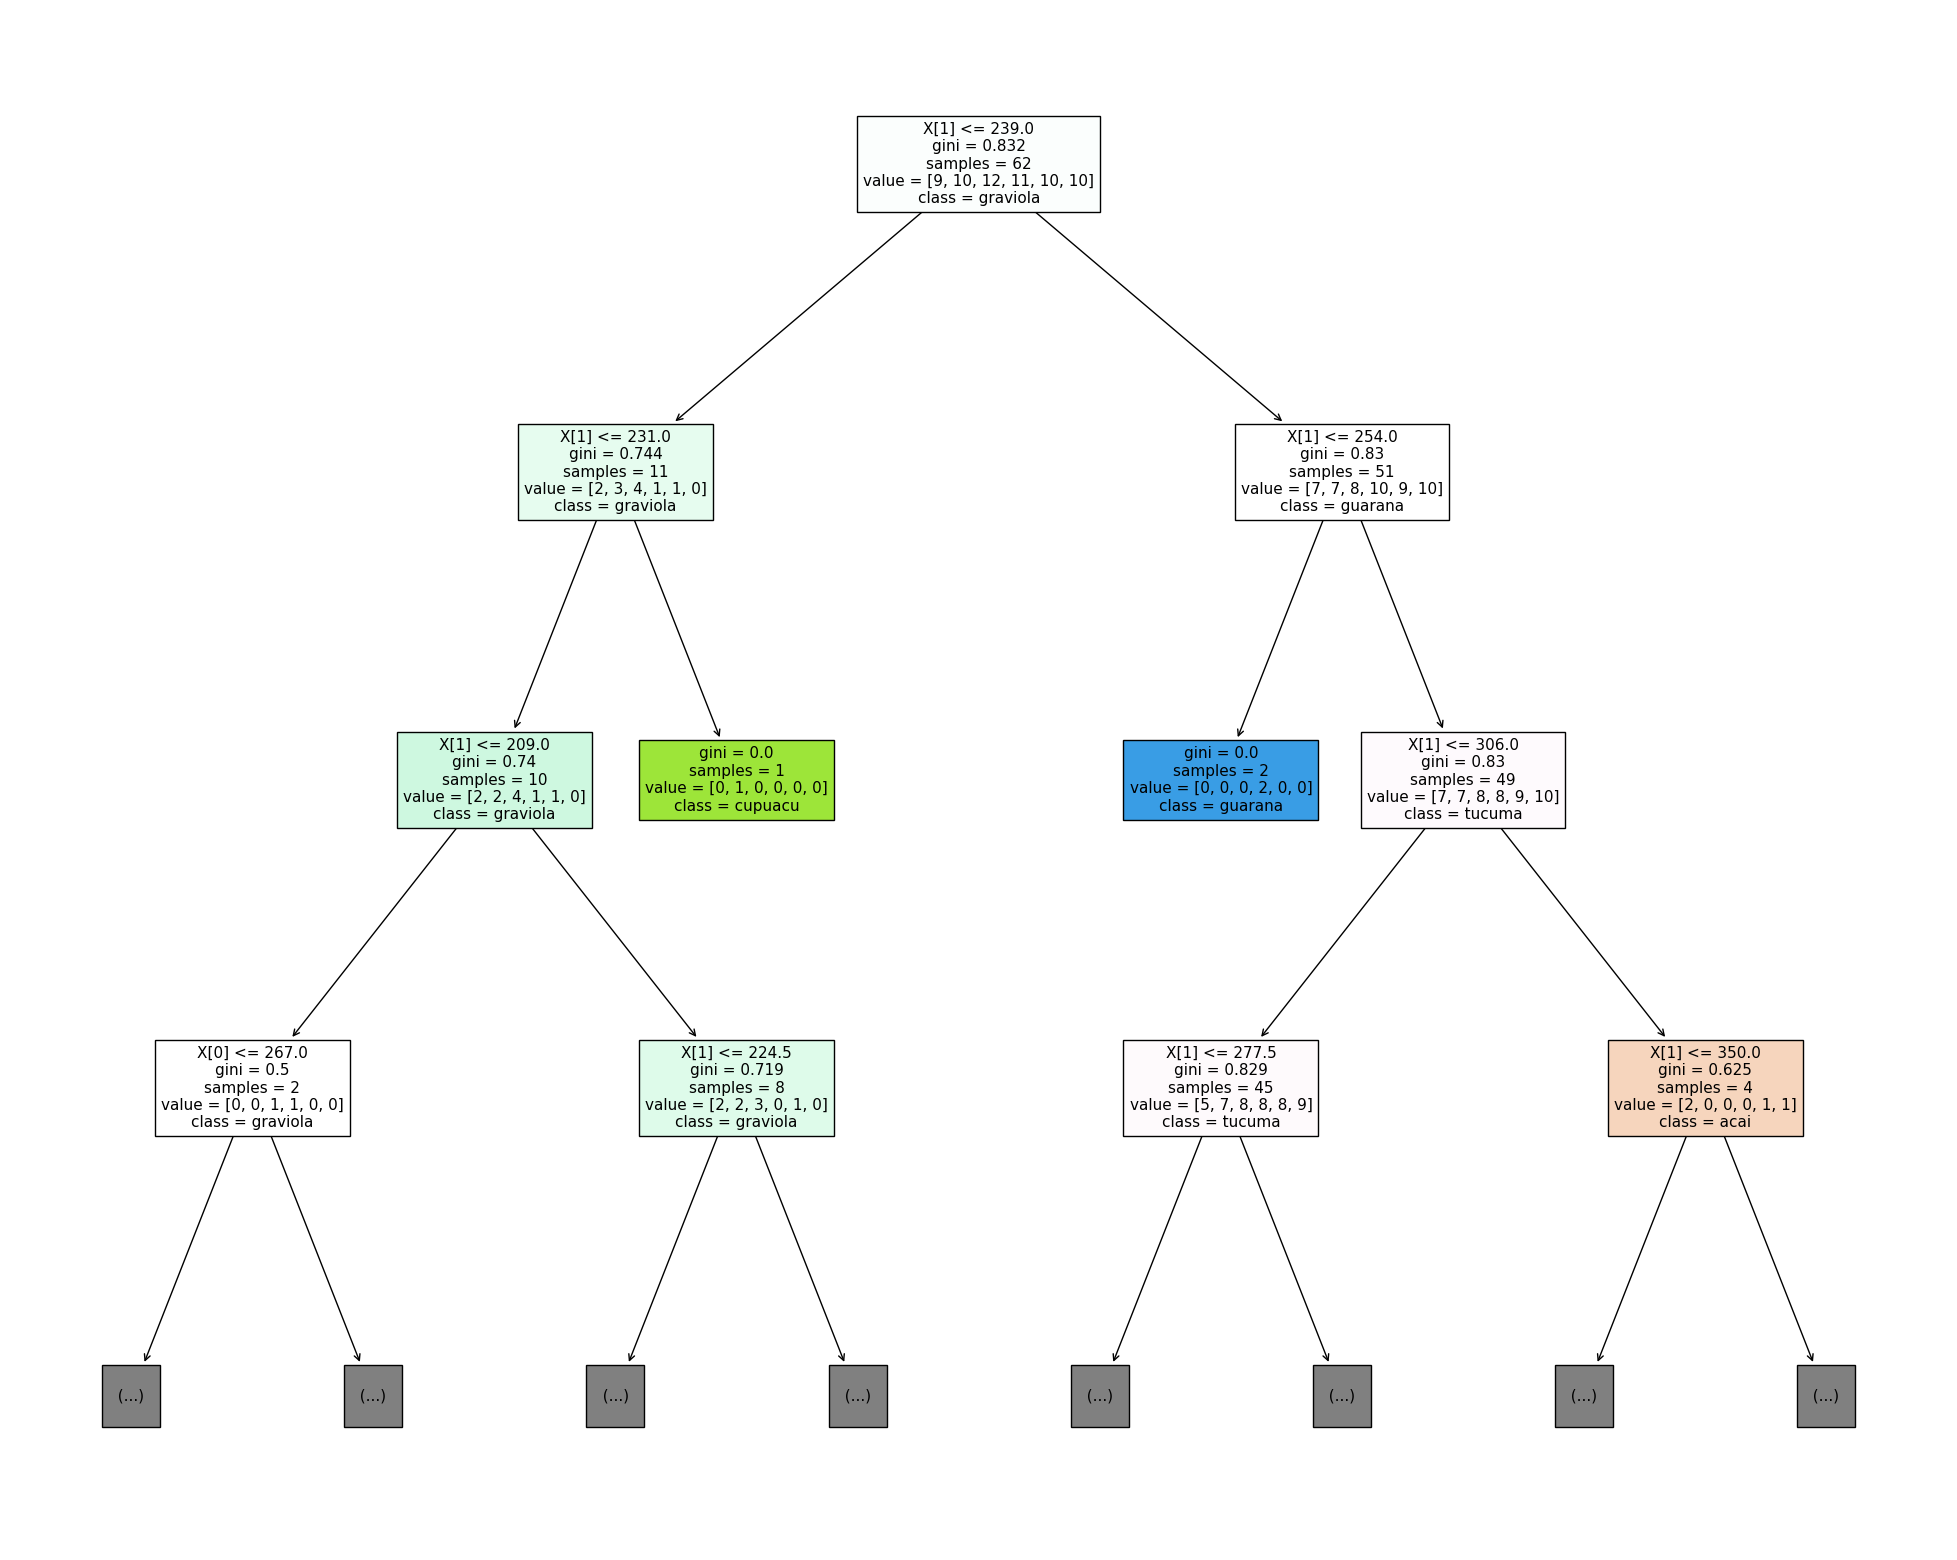

In [122]:
text_representation = tree.export_text(clf_best)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_best,
#                    feature_names=[1, 2, 3, 4, 5],
                   class_names=os.listdir('./train'),
                   max_depth=3,
                   filled=True)

## Part d

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
def compute_information_gain():
    res = dict(zip(vectorizer.vocabulary_, mutual_info_classif(X_vec, y, discrete_features=True)))
    return res

In [16]:
info_gain = compute_information_gain()

In [17]:
for split in ['andrew', 'sever', 'acceptance', 'anything', 'friends', 'gagnon']:
    print('The information gain for "%s" is %f' % (split, info_gain[split]))

The information gain for "andrew" is 0.048091
The information gain for "sever" is 0.003845
The information gain for "acceptance" is 0.021486
The information gain for "anything" is 0.004488
The information gain for "friends" is 0.002902
The information gain for "gagnon" is 0.009657


## Part e

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [19]:
def select_knn_model(neighbors, X_train, y_train, X_valid, y_valid):
    print("When k = %d:" % (neighbors))
    
    neigh = KNeighborsClassifier(n_neighbors=neighbors)
    
    neigh.fit(X_train, y_train)
    
    train_error = 1 - neigh.score(X_train, y_train)
    
    valid_error = 1 - neigh.score(X_valid, y_valid)
    
    print("Training error =", train_error)
    
    print("Validation error =", valid_error)
    
    print()
    
    return neigh, train_error, valid_error

In [20]:
models = []
train_errors = []
valid_errors = []
neighbors = []

model_best = None
error_best = 1.5
neighbor_best = -1

for k in range(1, 21):
    model, train_error, valid_error = select_knn_model(k, X_train, y_train, X_valid, y_valid)
    
    if valid_error < error_best:
        error_best = valid_error
        model_best = model
        neighbor_best = k
    
    models.append(model)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    neighbors.append(k)

print("The best model is trained with %d nearest neighbors" % (neighbor_best))

When k = 1:
Training error = 0.004778156996587013
Validation error = 0.2213375796178344

When k = 2:
Training error = 0.09999999999999998
Validation error = 0.2945859872611465

When k = 3:
Training error = 0.09692832764505122
Validation error = 0.2054140127388535

When k = 4:
Training error = 0.12150170648464165
Validation error = 0.2261146496815286

When k = 5:
Training error = 0.14573378839590445
Validation error = 0.20382165605095537

When k = 6:
Training error = 0.15392491467576797
Validation error = 0.2261146496815286

When k = 7:
Training error = 0.16621160409556313
Validation error = 0.21656050955414008

When k = 8:
Training error = 0.17337883959044365
Validation error = 0.21656050955414008

When k = 9:
Training error = 0.17815699658703077
Validation error = 0.2054140127388535

When k = 10:
Training error = 0.18805460750853242
Validation error = 0.2133757961783439

When k = 11:
Training error = 0.19180887372013655
Validation error = 0.21019108280254772

When k = 12:
Training err

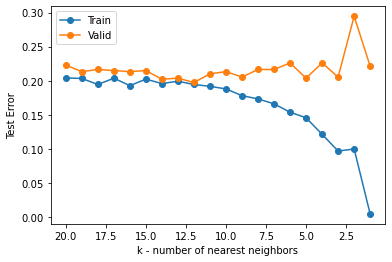

In [21]:
plt.plot(neighbors, train_errors, label = "Train", **{'marker': 'o'})
plt.plot(neighbors, valid_errors, label = "Valid", **{'marker': 'o'})

plt.xlabel("k - number of nearest neighbors")
plt.ylabel("Test Error")

ax = plt.gca()
ax.invert_xaxis()

plt.legend()
plt.show()

In [22]:
test_accuracy = model_best.score(X_test, y_test)

print("The testing accuracy for the best model is", test_accuracy)

The testing accuracy for the best model is 0.7678855325914149
